In [ ]:
counties.head()

In [67]:
# hehehe libraries

import pandas as pd # import the data
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# texas migration 

In [22]:
# texas migration 
gdf = gpd.read_file('115795-V3/AgChange/AgChange/shapefiles/US_counties_2012_geoid.shp')

#print(gdf.head())
print(gdf.crs)

print(gdf)

gdf = gdf.to_crs('EPSG:4326')

In [ ]:
gdf.plot()
plt.show()

In [52]:
# Step 1: Load the shapefile using geopandas
shapefile_path = '115795-V3/AgChange/AgChange/shapefiles/US_counties_2012_geoid.shp'
counties = gpd.read_file(shapefile_path)

# Step 2: Read the text file into a list
with open('115795-V3/AgChange/AgChange/AgCensus_MasterDataFrame.txt', 'r') as f:
    ag1 = f.readlines()

# Step 3: Split the data by tabs and convert to a pandas DataFrame
ag_data = [line.strip().split('\t') for line in ag1]
ag_df = pd.DataFrame(ag_data[1:], columns=ag_data[0])

# Step 4: Match the FIPS code between the shapefile data and ag_df
# Assuming the FIPS code is in the first column of the shapefile and 'FIPS' in the ag_df
fips_col_index = ag_df.columns.str.contains('FIPS').argmax()
counties['FIPS'] = counties.iloc[:, 0]  # Assuming the first column of shapefile contains FIPS codes
merged_data = pd.merge(counties, ag_df, left_on='FIPS', right_on=ag_df.columns[fips_col_index], how='left')

# Step 5: Convert all numeric columns to float (skip FIPS column)
for col in merged_data.columns[1:]:  # Exclude the FIPS column itself
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Step 6: Final Output
print('Ag Census data successfully imported!')
print(f"Number of counties: {len(merged_data)}")
print(f"Number of variables: {merged_data.shape[1]}")counties.head()

Ag Census data successfully imported!
Number of counties: 3109
Number of variables: 485


,FIPS,geometry
0,09001,"POLYGON ((-73.53134 41.52291, -73.523 41.62313..."
1,09011,"MULTIPOLYGON (((-71.96497 41.32917, -71.96499 ..."
2,10001,"POLYGON ((-75.51453 39.36546, -75.51096 39.365..."
3,09013,"POLYGON ((-72.13582 42.03074, -72.10231 42.029..."
4,10003,"POLYGON ((-75.59726 39.83786, -75.59547 39.838..."


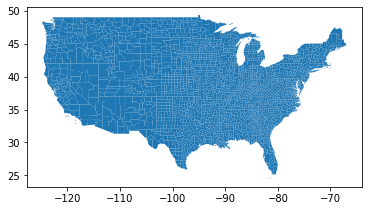

In [40]:
counties.plot()
plt.show()

C:\Users\swapo\AppData\Local\Temp/ipykernel_30596/122528061.py:6: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("USDA_PDP_AnalyticalResults.csv")


307


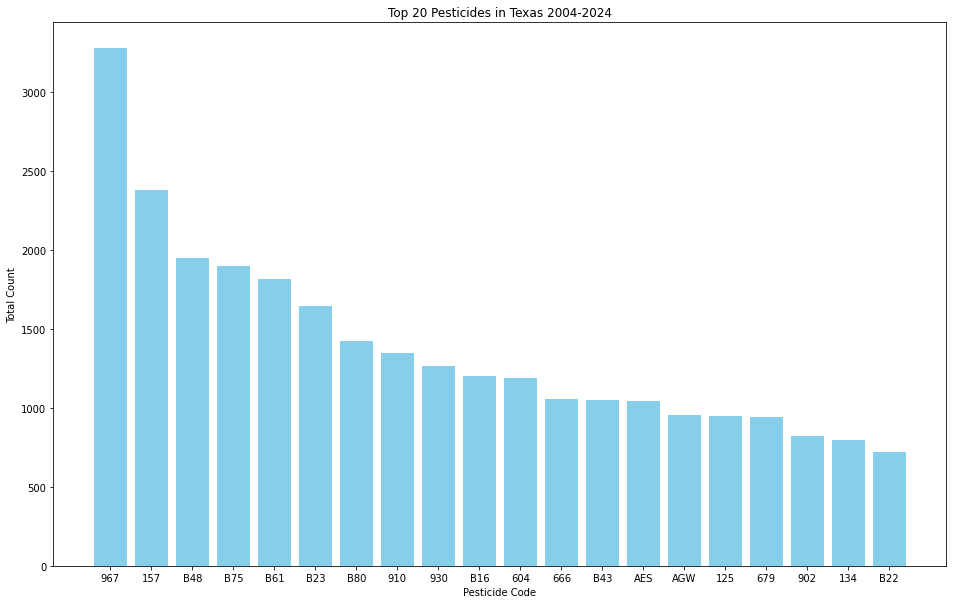

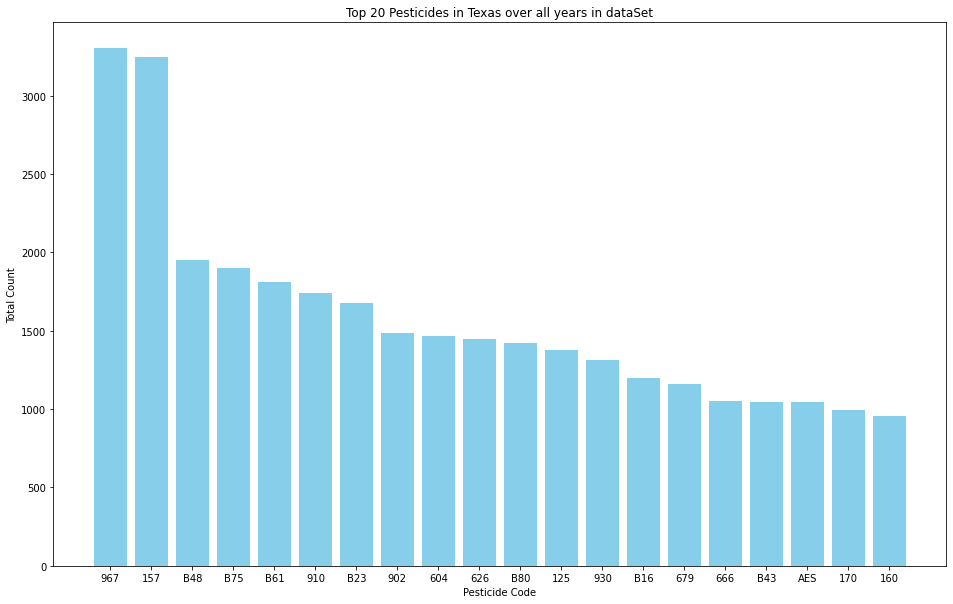

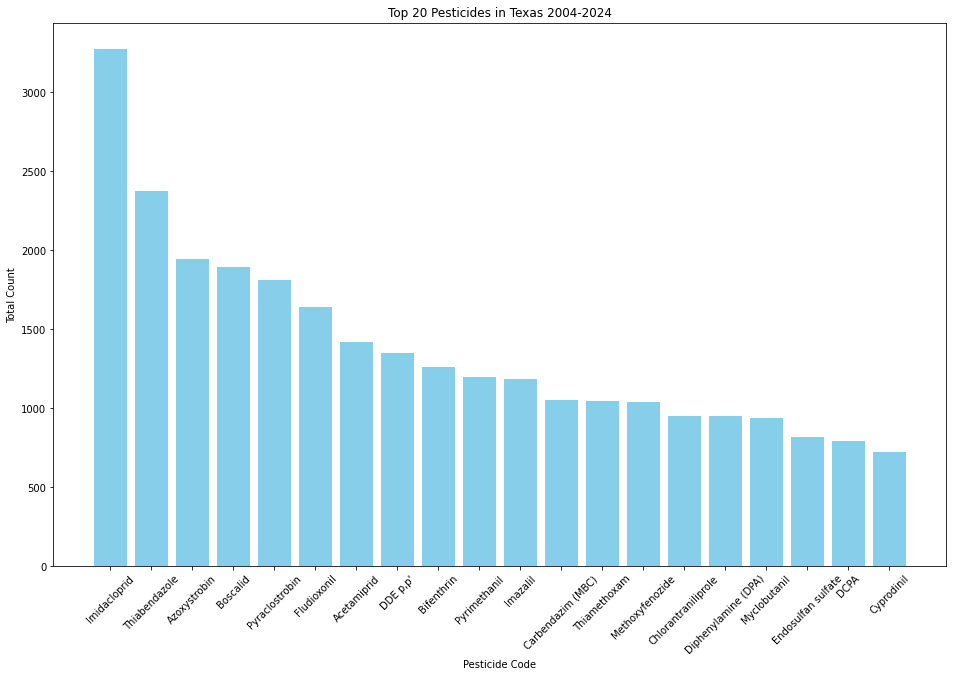

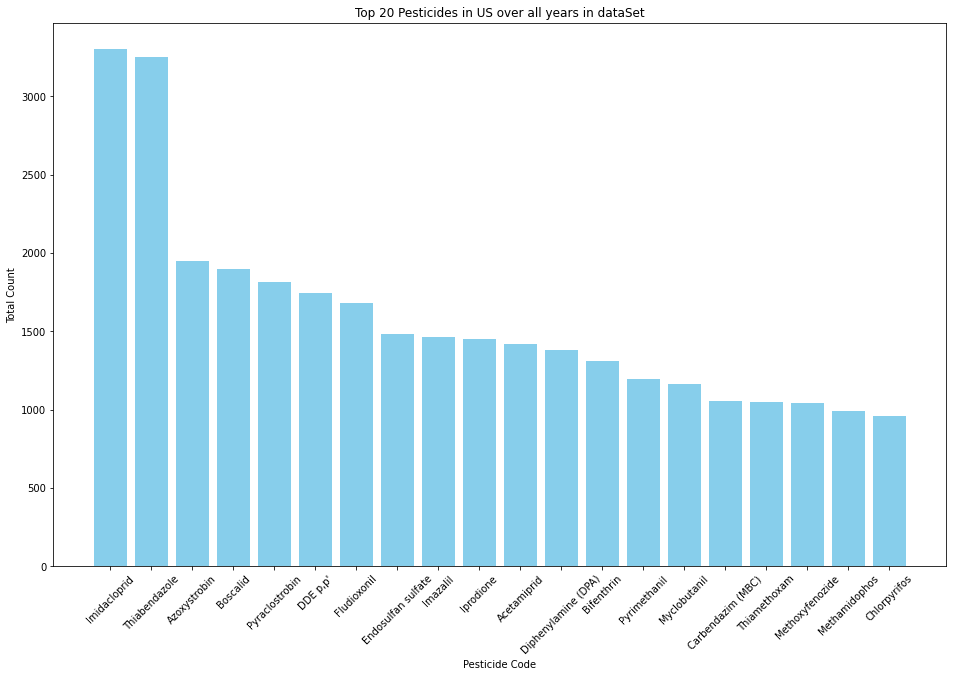

In [111]:
# state code dictionary

# import the data

# pdp data import 
df = pd.read_csv("USDA_PDP_AnalyticalResults.csv")

#print(df) # all data
#print(df.columns)
#print(df['Sample ID']) # state code

df_texas = df[df['Sample ID'].str.startswith('TX')]

#print(df_texas)
unique_code = df_texas['Pesticide Code'].unique()
print(len(unique_code))
#texas based on pesticide codes and how many occurances
p_Code = df_texas['Pesticide Code'].value_counts().reset_index()

#above data but filtered to past 20 years 
df_texas_20 = df_texas[df_texas['Sample ID'].str.match(r'TX(0[4-9]|1[0-9]|2[0-4])')]
p_Code_20 = df_texas_20['Pesticide Code'].value_counts().reset_index()

#p_Code but top 20 largest occurances of the pesticide code
top_20 = p_Code.nlargest(20, 'count')
top_20_20 = p_Code_20.nlargest(20, 'count')

# Create the bar graph for top 20 pesticides in Texas 2004-2024
plt.figure(figsize=(16, 10))
plt.bar(top_20_20['Pesticide Code'], top_20_20['count'], color='skyblue')

# Add titles and labels
plt.title('Top 20 Pesticides in Texas 2004-2024')
plt.xlabel('Pesticide Code')
plt.ylabel('Total Count')

# Show the bar graph
plt.show()

# Create the bar graph for top 20 pesticides in Texas 2004-2024
plt.figure(figsize=(16, 10))
plt.bar(top_20['Pesticide Code'], top_20['count'], color='skyblue')

# Add titles and labels
plt.title('Top 20 Pesticides in Texas over all years in dataSet')
plt.xlabel('Pesticide Code')
plt.ylabel('Total Count')

# Show the bar graph
plt.show()


#texas based on pesticide codes and how many occurances
p_Name = df_texas['Pesticide Name'].value_counts().reset_index()

#above data but filtered to past 20 years 
df_texas_20 = df_texas[df_texas['Sample ID'].str.match(r'TX(0[4-9]|1[0-9]|2[0-4])')]
p_Name_20 = df_texas_20['Pesticide Name'].value_counts().reset_index()

#p_Code but top 20 largest occurances of the pesticide code
top_20_Name = p_Name.nlargest(20, 'count')
top_20_20_Name = p_Name_20.nlargest(20, 'count')

# Create the bar graph for top 20 pesticides in Texas 2004-2024
plt.figure(figsize=(16, 10))
plt.bar(top_20_20_Name['Pesticide Name'], top_20_20_Name['count'], color='skyblue')

# Add titles and labels
plt.title('Top 20 Pesticides in Texas 2004-2024')
plt.xlabel('Pesticide Code')
plt.ylabel('Total Count')

# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Show the bar graph
plt.show()

# Create the bar graph for top 20 pesticides in Texas 2004-2024
plt.figure(figsize=(16, 10))
plt.bar(top_20_Name['Pesticide Name'], top_20_Name['count'], color='skyblue')

# Add titles and labels
plt.title('Top 20 Pesticides in US over all years in dataSet')
plt.xlabel('Pesticide Code')
plt.ylabel('Total Count')

# Rotate x-axis labels
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Show the bar graph
plt.show()

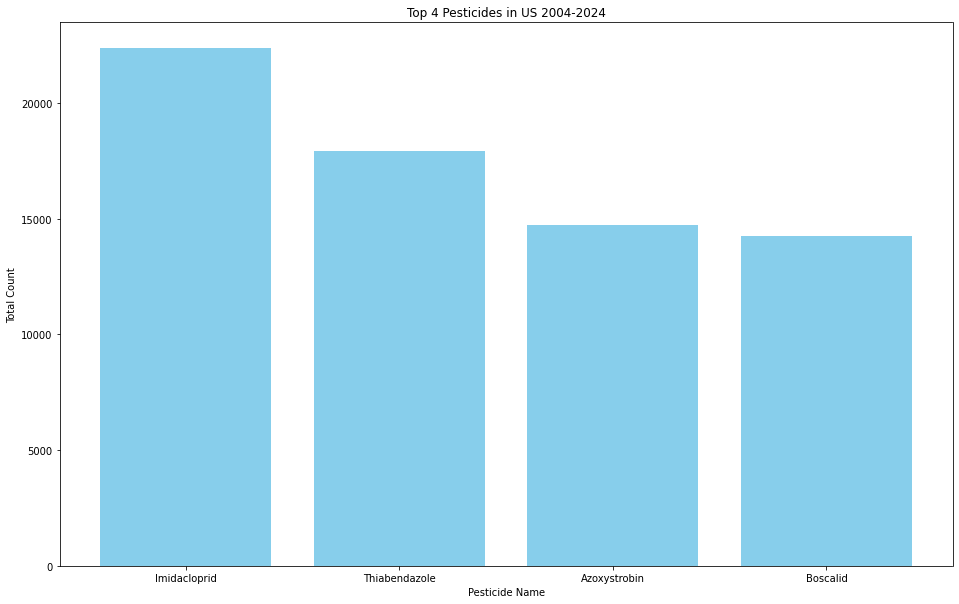

C:\Users\swapo\AppData\Local\Temp/ipykernel_30596/2634373360.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['State Code'] = df_top['Sample ID'].str[:2]


   State Code  count
0          CA   4686
1          NY   3544
2          TX   3276
3          FL   2319
4          OH   2103
5          MI   2045
6          WA   1457
7          MD   1203
8          CO    763
9          WI    393
10         NC    176
11         VA    131
12         TN    106
13         DC     54
14         LA     25
15         IL     24
16         IN     14
17         MO      8
18         NJ      8
19         GA      7
20         AL      3
21         SC      3
22         KS      2
23         PA      2
24         RI      1
25         IA      1
26         NH      1
27         MN      1
28         CT      1
29         ID      1
30         MT      1
31         OR      1
32         AZ      1
0                                    West Virginia
1                                          Florida
2                                         Illinois
3                                        Minnesota
4                                         Maryland
5                              

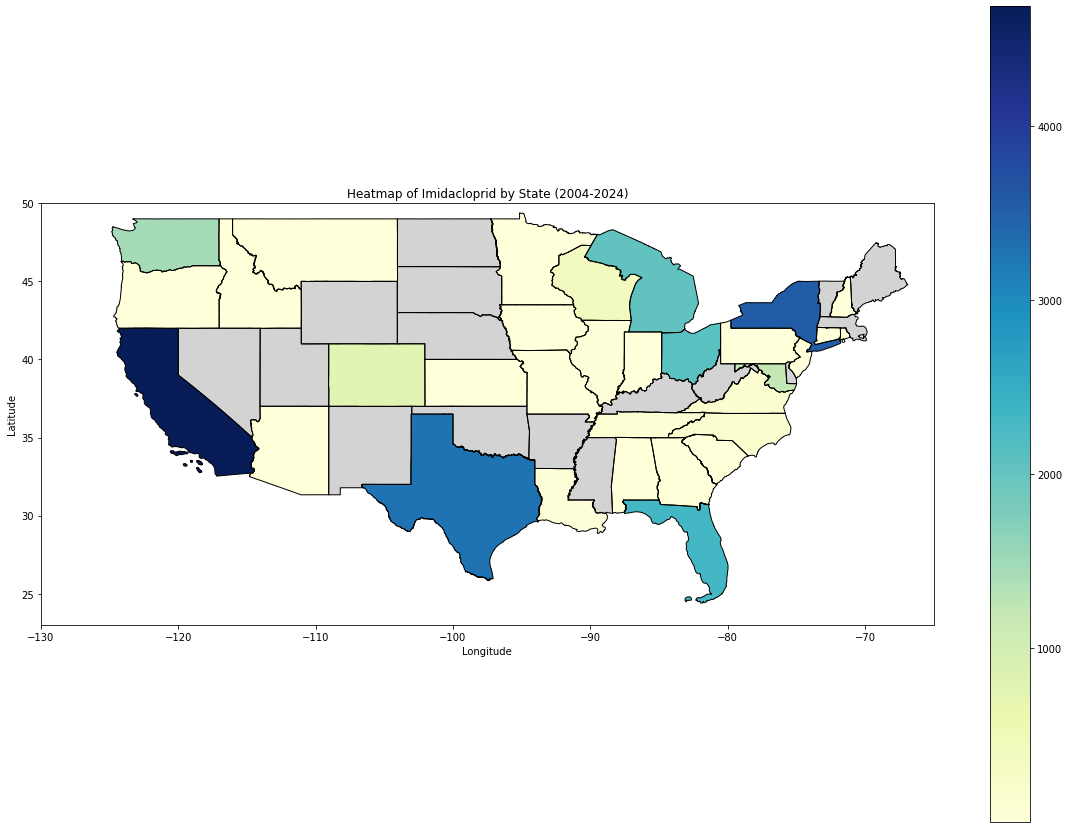

C:\Users\swapo\AppData\Local\Temp/ipykernel_30596/2634373360.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_2['State Code'] = df_top_2['Sample ID'].str[:2]


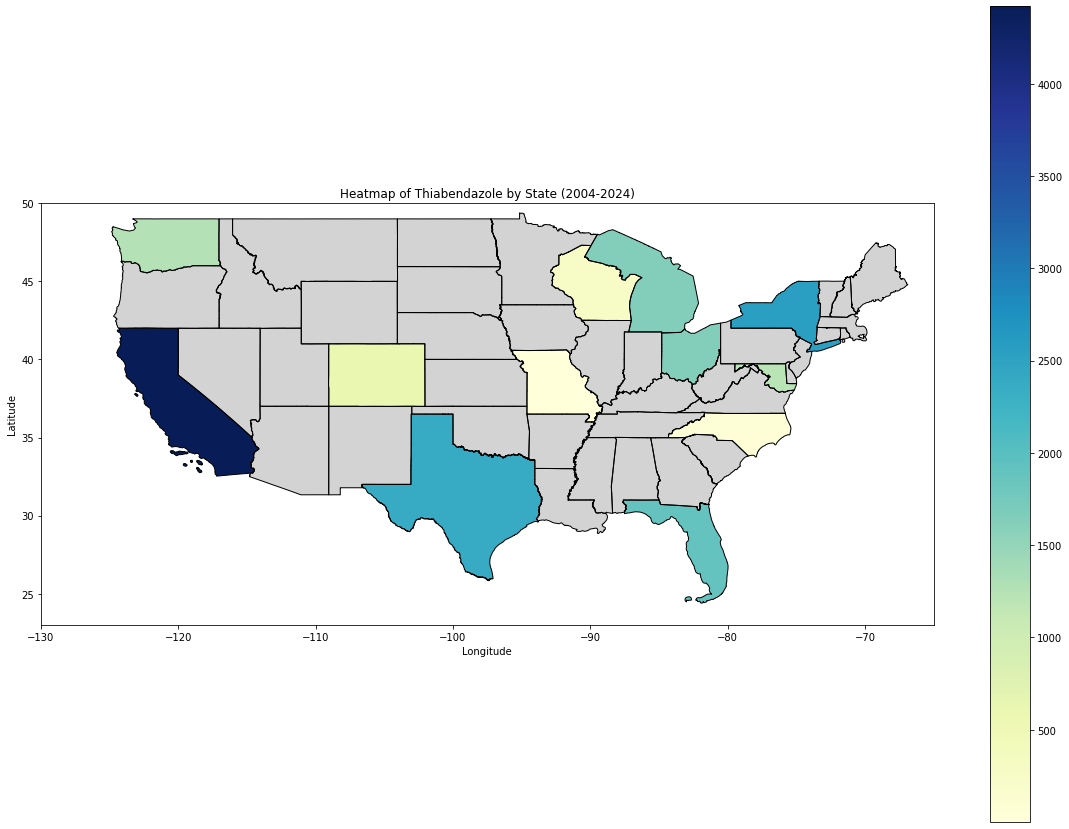

C:\Users\swapo\AppData\Local\Temp/ipykernel_30596/2634373360.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_3['State Code'] = df_top_3['Sample ID'].str[:2]


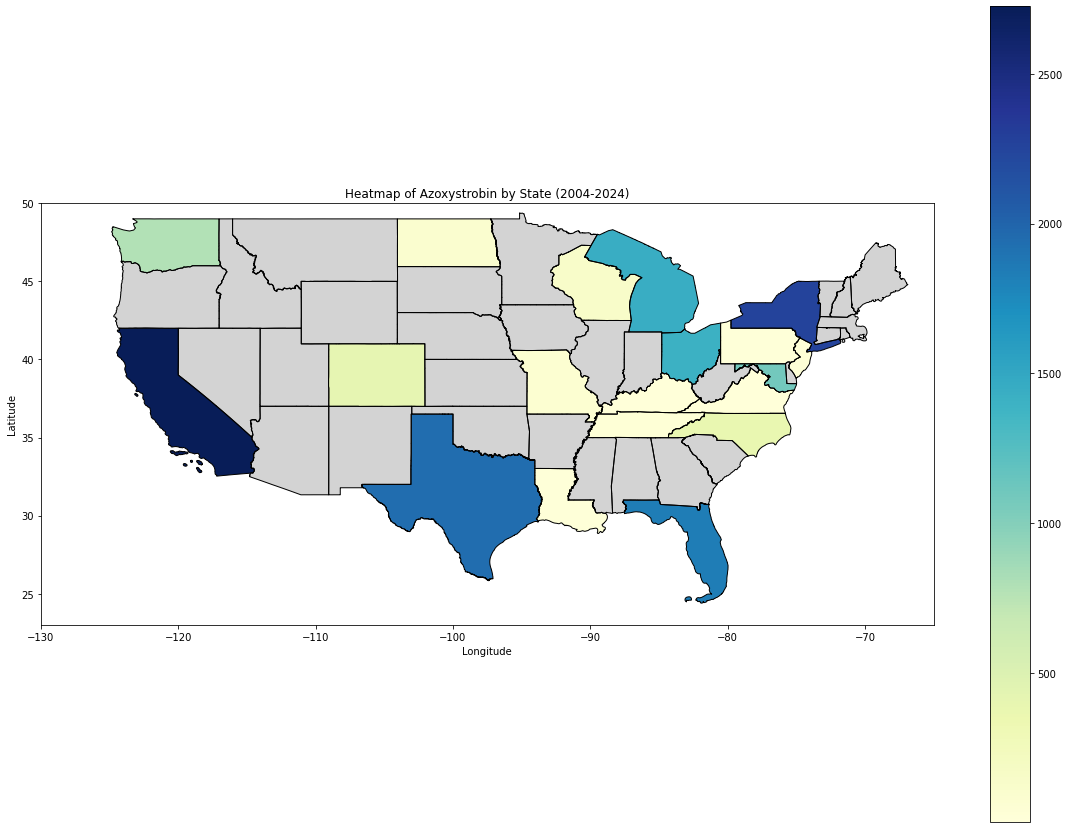

C:\Users\swapo\AppData\Local\Temp/ipykernel_30596/2634373360.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_4['State Code'] = df_top_4['Sample ID'].str[:2]


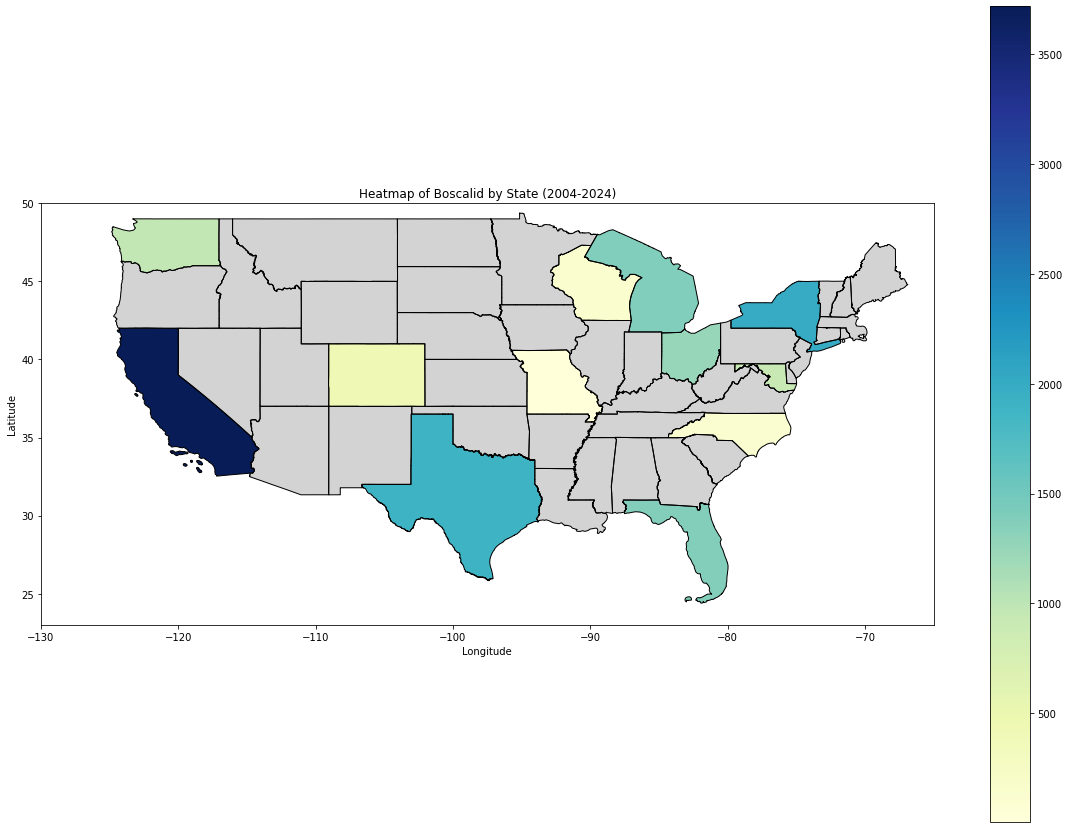

In [98]:
# heat map based on top 4 pesticides in the nation in the past 20 years

df_20 = df[df['Sample ID'].str.match(r'.{2}(0[4-9]|1[0-9]|2[0-4])')]
df_20_PN = df_20['Pesticide Name'].value_counts().reset_index()
df_20_PN_4 = df_20_PN.nlargest(4, 'count') #top 4 pesticides Name


# Create the bar graph for top 4 pesticides in US 2004-2024
plt.figure(figsize=(16, 10))
plt.bar(df_20_PN_4['Pesticide Name'], df_20_PN_4['count'], color='skyblue')

# Add titles and labels
plt.title('Top 4 Pesticides in US 2004-2024')
plt.xlabel('Pesticide Name')
plt.ylabel('Total Count')

# Show the bar graph
plt.show()

state_code_to_name = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'DC': 'District of Columbia',
    'PR': 'Puerto Rico'  # Optional, as it's a territory
}

#making the heat map for top 1 pesticide name
top_pesticide = df_20_PN.nlargest(1, 'count')['Pesticide Name'].values[0]
df_top = df_20[df_20['Pesticide Name'] == top_pesticide]
df_top['State Code'] = df_top['Sample ID'].str[:2]
state_counts = df_top['State Code'].value_counts().reset_index()
print(state_counts)


shapefileP_state = 'tl_2023_us_state/tl_2023_us_state.shp'
states = gpd.read_file(shapefileP_state)
print(states['NAME'])
state_counts['State Name'] = state_counts['State Code'].map(state_code_to_name)
merged = states.merge(state_counts, left_on='NAME', right_on='State Name', how='left')

# Step: Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot boundaries
merged.plot(column='count', ax=ax, legend=True,
            cmap='YlGnBu', missing_kwds={'color': 'lightgrey'})

ax.set_xlim([-130, -65])  # Only show longitudes from -180 to 0
ax.set_ylim([23, 50])  # Adjust according to your needs

plt.title(f'Heatmap of {top_pesticide} by State (2004-2024)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

#making the heat map for top 2 pesticide name
top_2_pesticides = df_20_PN.nlargest(2, 'count')
# Get the second top pesticide
second_top_pesticide = top_2_pesticides.iloc[1]['Pesticide Name']
df_top_2 = df_20[df_20['Pesticide Name'] == second_top_pesticide]
df_top_2['State Code'] = df_top_2['Sample ID'].str[:2]
state_counts = df_top_2['State Code'].value_counts().reset_index()
#print(state_counts)

shapefileP_state = 'tl_2023_us_state/tl_2023_us_state.shp'
states = gpd.read_file(shapefileP_state)
#print(states['NAME'])
state_counts['State Name'] = state_counts['State Code'].map(state_code_to_name)
merged = states.merge(state_counts, left_on='NAME', right_on='State Name', how='left')

# Step: Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot boundaries
merged.plot(column='count', ax=ax, legend=True,
            cmap='YlGnBu', missing_kwds={'color': 'lightgrey'})

ax.set_xlim([-130, -65])  # Only show longitudes from -180 to 0
ax.set_ylim([23, 50])  # Adjust according to your needs

plt.title(f'Heatmap of {second_top_pesticide} by State (2004-2024)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


#making the heat map for top 3 pesticide name
top_3_pesticides = df_20_PN.nlargest(3, 'count')
# Get the second top pesticide
third_top_pesticide = top_3_pesticides.iloc[2]['Pesticide Name']
df_top_3 = df_20[df_20['Pesticide Name'] == third_top_pesticide]
df_top_3['State Code'] = df_top_3['Sample ID'].str[:2]
state_counts = df_top_3['State Code'].value_counts().reset_index()
#print(state_counts)

shapefileP_state = 'tl_2023_us_state/tl_2023_us_state.shp'
states = gpd.read_file(shapefileP_state)
#print(states['NAME'])
state_counts['State Name'] = state_counts['State Code'].map(state_code_to_name)
merged = states.merge(state_counts, left_on='NAME', right_on='State Name', how='left')

# Step: Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot boundaries
merged.plot(column='count', ax=ax, legend=True,
            cmap='YlGnBu', missing_kwds={'color': 'lightgrey'})

ax.set_xlim([-130, -65])  # Only show longitudes from -180 to 0
ax.set_ylim([23, 50])  # Adjust according to your needs

plt.title(f'Heatmap of {third_top_pesticide} by State (2004-2024)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

#making the heat map for top 4 pesticide name
top_4_pesticides = df_20_PN.nlargest(4, 'count')
# Get the second top pesticide
fourth_top_pesticide = top_4_pesticides.iloc[3]['Pesticide Name']
df_top_4 = df_20[df_20['Pesticide Name'] == fourth_top_pesticide]
df_top_4['State Code'] = df_top_4['Sample ID'].str[:2]
state_counts = df_top_4['State Code'].value_counts().reset_index()
#print(state_counts)

shapefileP_state = 'tl_2023_us_state/tl_2023_us_state.shp'
states = gpd.read_file(shapefileP_state)
#print(states['NAME'])
state_counts['State Name'] = state_counts['State Code'].map(state_code_to_name)
merged = states.merge(state_counts, left_on='NAME', right_on='State Name', how='left')

# Step: Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot boundaries
merged.plot(column='count', ax=ax, legend=True,
            cmap='YlGnBu', missing_kwds={'color': 'lightgrey'})

ax.set_xlim([-130, -65])  # Only show longitudes from -180 to 0
ax.set_ylim([23, 50])  # Adjust according to your needs

plt.title(f'Heatmap of {fourth_top_pesticide} by State (2004-2024)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()



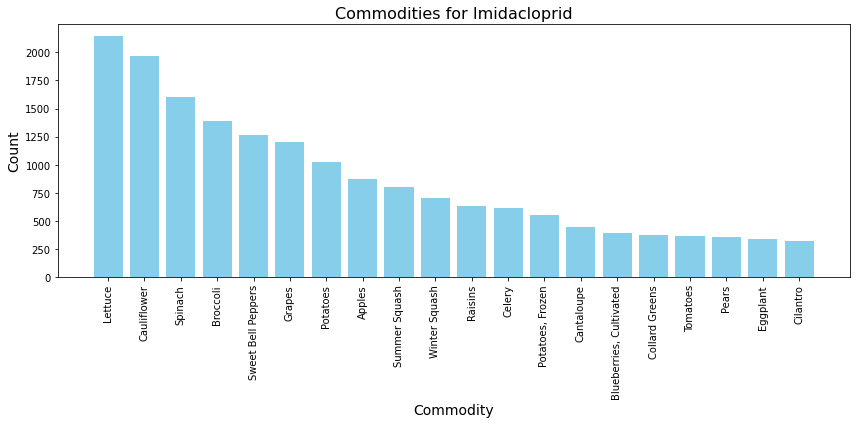

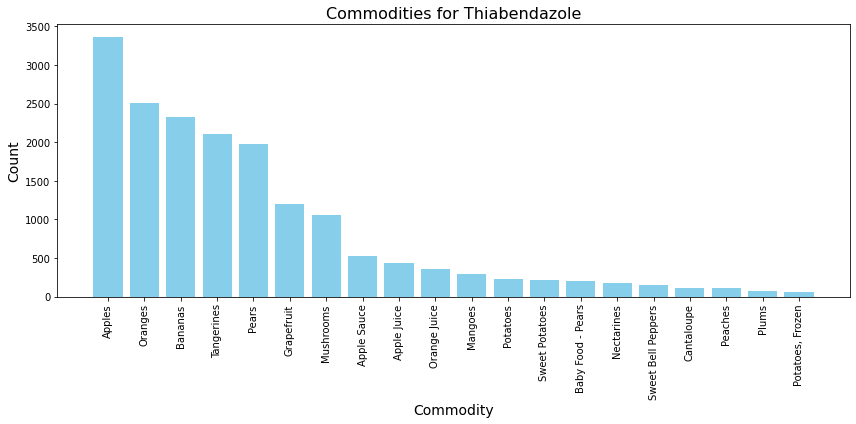

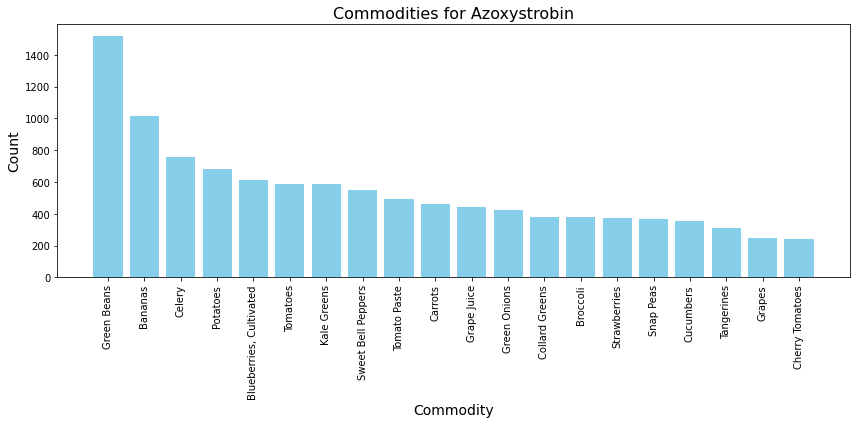

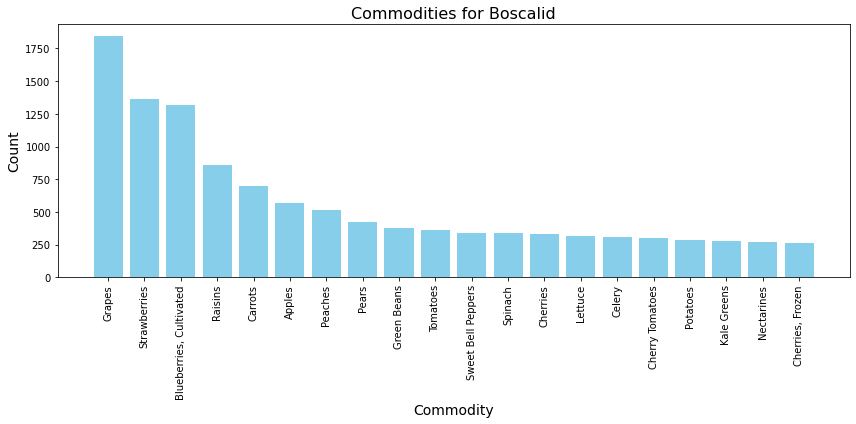

  Pesticide Name  count
0   Imidacloprid  22361
1  Thiabendazole  17906
2   Azoxystrobin  14728
3       Boscalid  14262


In [110]:
# In the past 20 years the top 4 pesticides are used with the following crops
df_20 = df[df['Sample ID'].str.match(r'.{2}(0[4-9]|1[0-9]|2[0-4])')]
top_4_pesticides = df_20_PN.nlargest(4, 'count')


commodity_code_to_name = pd.read_csv("Commodity.csv")

first_top_pesticide = top_4_pesticides.iloc[0]['Pesticide Name']
df_first_top = df_20[df_20['Pesticide Name'] == first_top_pesticide]
commodity_counts = df_first_top['Commod'].value_counts().reset_index()
commodity_counts = commodity_counts.nlargest(20, 'count')
commodity_counts.columns = ['Commodity', 'Count']  # Rename columns
commodity_code_to_name.columns = ['Commodity', 'Commodity Name']  # Rename columns if necessary
commodity_counts = commodity_counts.merge(commodity_code_to_name, on='Commodity', how='left')
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(commodity_counts['Commodity Name'], commodity_counts['Count'], color='skyblue')
 
# Add titles and labels
plt.title(f'Commodities for {first_top_pesticide}', fontsize=16)
plt.xlabel('Commodity', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x labels for better visibility
plt.xticks(rotation=90)

# Show the bar chart
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

second_top_pesticide = top_4_pesticides.iloc[1]['Pesticide Name']
df_second_top = df_20[df_20['Pesticide Name'] == second_top_pesticide]
commodity_counts = df_second_top['Commod'].value_counts().reset_index()
commodity_counts = commodity_counts.nlargest(20, 'count')
commodity_counts.columns = ['Commodity', 'Count']  # Rename columns
commodity_code_to_name.columns = ['Commodity', 'Commodity Name']  # Rename columns if necessary
commodity_counts = commodity_counts.merge(commodity_code_to_name, on='Commodity', how='left')
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(commodity_counts['Commodity Name'], commodity_counts['Count'], color='skyblue')

# Add titles and labels
plt.title(f'Commodities for {second_top_pesticide}', fontsize=16)
plt.xlabel('Commodity', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x labels for better visibility
plt.xticks(rotation=90)

# Show the bar chart
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

third_top_pesticide = top_4_pesticides.iloc[2]['Pesticide Name']
df_third_top = df_20[df_20['Pesticide Name'] == third_top_pesticide]
commodity_counts = df_third_top['Commod'].value_counts().reset_index()
commodity_counts = commodity_counts.nlargest(20, 'count')
commodity_counts.columns = ['Commodity', 'Count']  # Rename columns
commodity_code_to_name.columns = ['Commodity', 'Commodity Name']  # Rename columns if necessary
commodity_counts = commodity_counts.merge(commodity_code_to_name, on='Commodity', how='left')
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(commodity_counts['Commodity Name'], commodity_counts['Count'], color='skyblue')

# Add titles and labels
plt.title(f'Commodities for {third_top_pesticide}', fontsize=16)
plt.xlabel('Commodity', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x labels for better visibility
plt.xticks(rotation=90)

# Show the bar chart
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

fourth_top_pesticide = top_4_pesticides.iloc[3]['Pesticide Name']
df_fourth_top = df_20[df_20['Pesticide Name'] == fourth_top_pesticide]
commodity_counts = df_fourth_top['Commod'].value_counts().reset_index()
commodity_counts = commodity_counts.nlargest(20, 'count')
commodity_counts.columns = ['Commodity', 'Count']  # Rename columns
commodity_code_to_name.columns = ['Commodity', 'Commodity Name']  # Rename columns if necessary
commodity_counts = commodity_counts.merge(commodity_code_to_name, on='Commodity', how='left')
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(commodity_counts['Commodity Name'], commodity_counts['Count'], color='skyblue')

# Add titles and labels
plt.title(f'Commodities for {fourth_top_pesticide}', fontsize=16)
plt.xlabel('Commodity', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x labels for better visibility
plt.xticks(rotation=90)

# Show the bar chart
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

print(top_4_pesticides)

In [ ]:
# by county based on the Pesticide Data Program

In [ ]:
# statistical analysis to examine whether there is a significant correlation between pesticide use and the decline in monarch butterfly populations